In [1]:
#Code to generate plots describing
#the average AQI levels per month
#alongside the prominent pollutant
#for the year 2019

import pandas
import math
import matplotlib.pyplot as plt


In [2]:
data = pandas.read_csv('../Aim 1/prominent.csv')
cities = ['Chandigarh', 'Shillong', 'Lucknow', 'Amritsar', 'Gurugram', 'Ahmedabad', 'Aizawl', 'Brajrajnagar', 'Talcher', 'Jaipur', 'Guwahati', 'Delhi', 'Bhopal', 'Kolkata', 'Kochi', 'Amaravati', 'Visakhapatnam', 'Mumbai', 'Chennai', 'Hyderabad', 'Patna', 'Jorapokhar', 'Bengaluru', 'Coimbatore', 'Ernakulam', 'Thiruvananthapuram', 'Ujjain', 'Pithampur']
month=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

Chandigarh


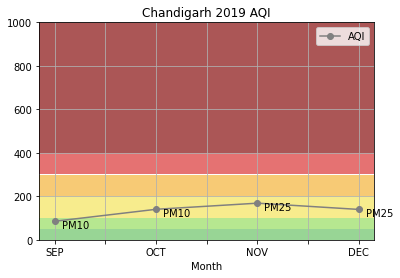

Shillong


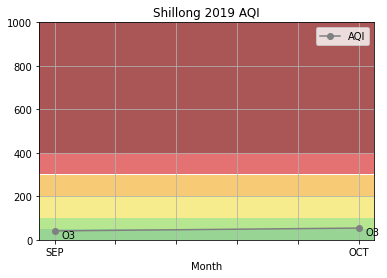

Lucknow


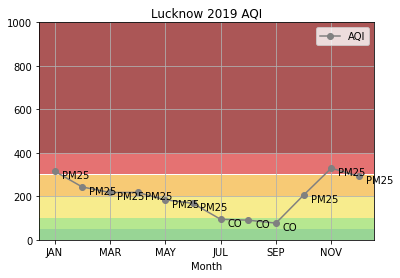

Amritsar


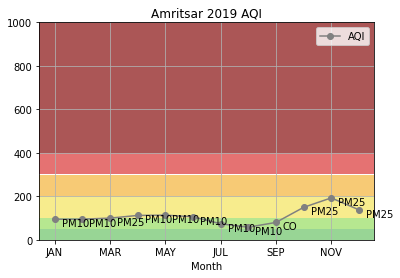

Gurugram


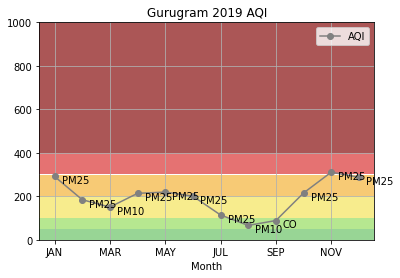

Ahmedabad


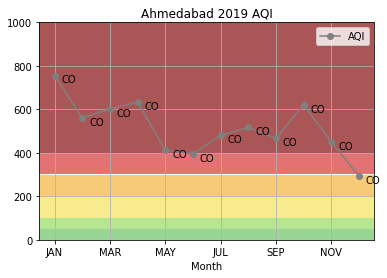

Aizawl


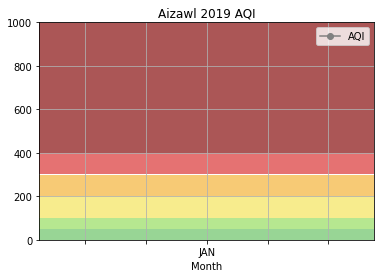

Brajrajnagar


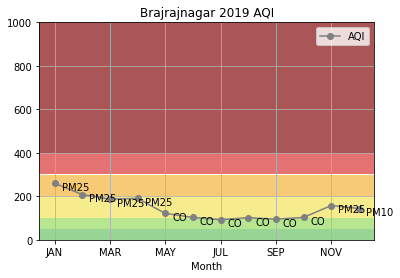

Talcher


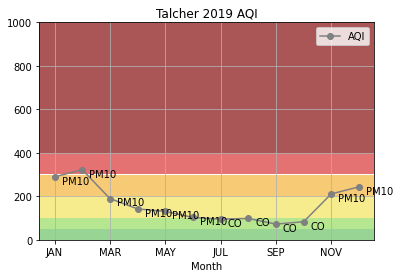

Jaipur


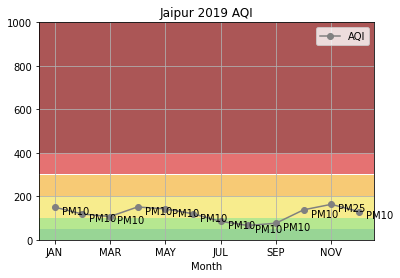

Guwahati


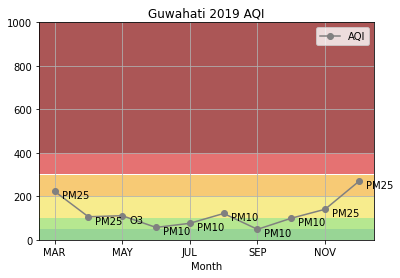

Delhi


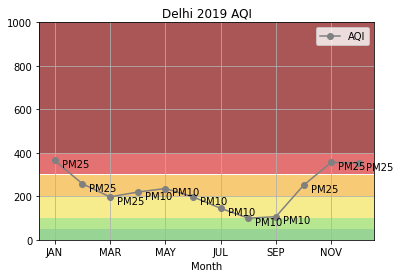

Bhopal


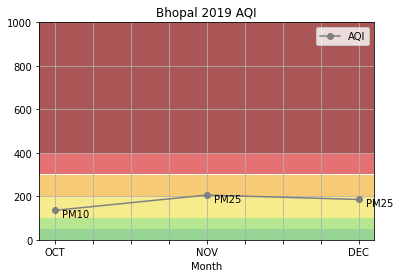

Kolkata


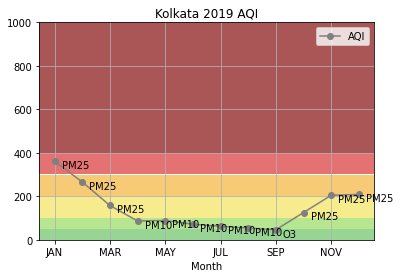

Kochi


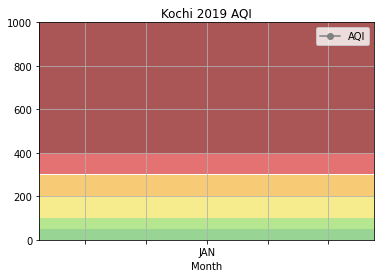

Amaravati


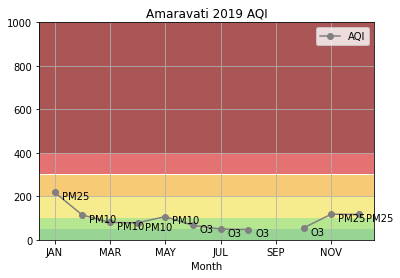

Visakhapatnam


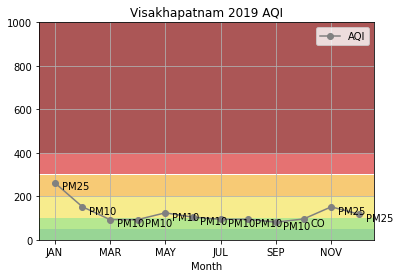

Mumbai


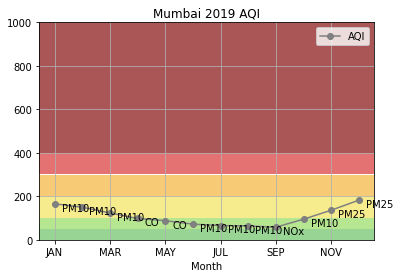

Chennai


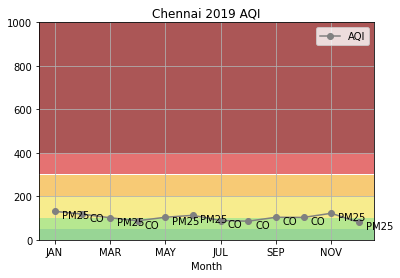

Hyderabad


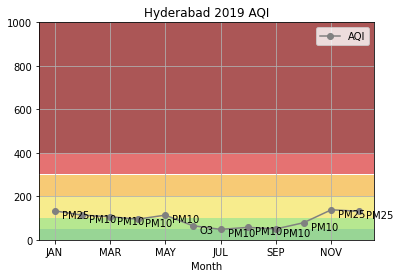

Patna


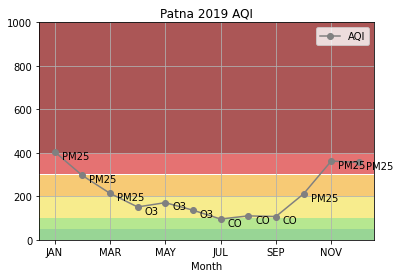

Jorapokhar


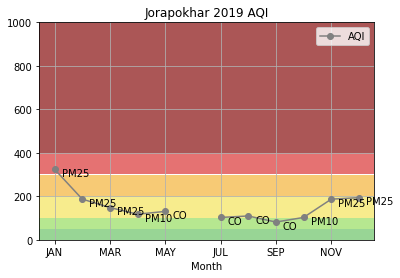

Bengaluru


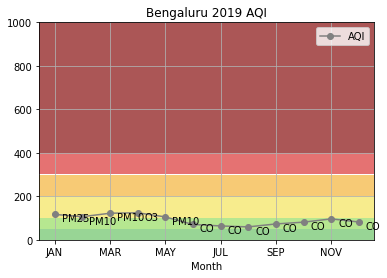

Coimbatore


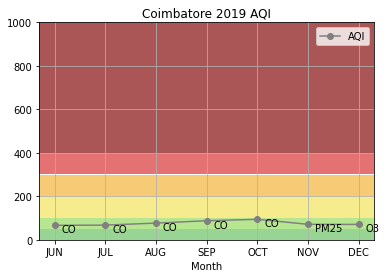

Ernakulam


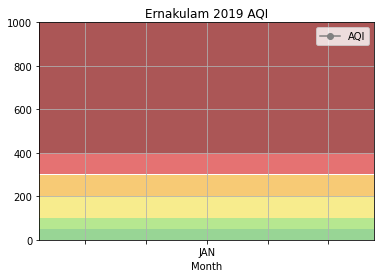

Thiruvananthapuram


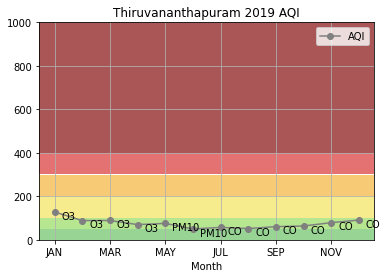

Ujjain


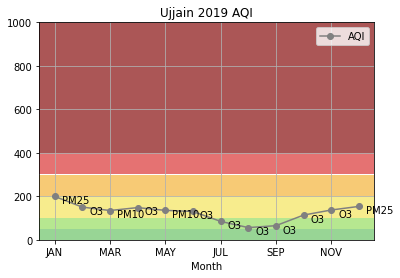

Pithampur


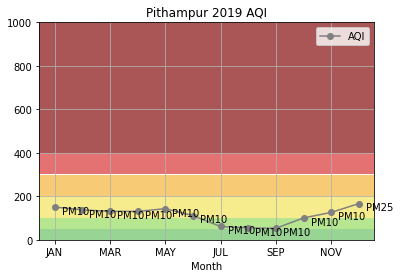

In [3]:
#Average out AQI values per month
for city in cities:
	print(city)
	temp = data.loc[data['City'] == city]
	if(not temp.empty):
		for i in range(2019,2020):
			final = pandas.DataFrame(columns=['Month','Mean','Pollutant'])
			for j in range(1,13):
				count=0
				aqisum=0
				prominent = {}
				for k in range(1,32):
					date = str(i)+'-'+str("%02d" % j)+'-'+str("%02d" % k)
					record = temp.loc[temp['Date'] == date]
					if(not record.empty):
						if(not math.isnan(record['AQI'])):
							aqisum = aqisum + record.iloc[0]['AQI']
							count = count + 1
							pollutants = record['AQI_label'].to_string()
							pollutants = pollutants.replace('\'','')
							pollutants = pollutants.split('(', 1)[-1]
							pollutants = pollutants.split(')', 1)[0]
							for pollutant in pollutants.split(','):
								if(str(pollutant) in prominent):
									prominent[str(pollutant)]=prominent[pollutant]+1
								
								elif(str(pollutant) != ''):
									prominent[str(pollutant)]=0
								
							
						
					
				
				if(prominent):
					mark = max(prominent, key=prominent.get)

				else:
					mark = ''
				
				if(count <= 15):
					mean=float('NaN')

				else:
					mean=float(aqisum/count)

				final = final.append({'Month': month[j-1], 'Mean': mean, 'Pollutant':mark.replace('_SubIndex','')},ignore_index=True)
			
		#Plot average AQI per month
		#and the corresponding prominent pollutant
		fig, ax = plt.subplots()
		final.plot(x='Month',y='Mean',ax=ax,title = str(city+' 2019 AQI'),grid=True,label='AQI',marker='o',color='grey')
		for index,row in final.iterrows():
			ax.annotate(text=row['Pollutant'], xy=(index,row['Mean']), xytext=(7,-7), textcoords='offset points', family='sans-serif', fontsize=10, color='black')
		
		plt.ylim(0,1000)
		plt.axhspan(0, 50, facecolor='#6DC469', alpha=0.7)
		plt.axhspan(51, 100, facecolor='#98DD61', alpha=0.7)
		plt.axhspan(101, 200, facecolor='#F4E45D', alpha=0.7)
		plt.axhspan(201, 300, facecolor='#F5B43B', alpha=0.7)
		plt.axhspan(301, 400, facecolor='#DB3636', alpha=0.7)
		plt.axhspan(401, 1000, facecolor='#880F0F', alpha=0.7)
		plt.show()